In [1]:
# # Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b47e98e8481330aa384bb9325780ce9bb6db23221c03bfed195df1e638b3d788
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#!pip install plotly
# !pip install sort-dataframeby-monthorweek
!pip install sorted_months_weekdays
!pip install --root-user-action=ignore sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted_months_weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=04af9afe8274451cc658027d32917db4d9d0a7fd1bd056f9487b154925ed2553
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted_months_weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=bb0a805c7ca011d66cd557e040c261eec006b688bfaa32e46e1720f33f93e46a
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sort_dataframeby_monthorweek as sm
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import pandas as pd
# from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.sql import SparkSession
import pandas as pd

In [4]:
# read the data
# Store the path in variables
data = "/content/egphotelbookings.csv"

# Load the data
data = pd.read_csv(data,low_memory=False)

In [5]:
data.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


In [6]:
data.shape


(7326, 30)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      7326 non-null   int64  
 1   hotel                           7326 non-null   object 
 2   is_canceled                     7326 non-null   int64  
 3   lead_time                       7326 non-null   int64  
 4   arrival_date_year               7326 non-null   int64  
 5   arrival_date_month              7326 non-null   object 
 6   arrival_date_week_number        7326 non-null   int64  
 7   arrival_date_day_of_month       7326 non-null   int64  
 8   stays_in_weekend_nights         7326 non-null   int64  
 9   stays_in_week_nights            7326 non-null   int64  
 10  adults                          7326 non-null   int64  
 11  children                        7326 non-null   int64  
 12  babies                          73

There are total 30 variables(categorical and continuous) with one dependent variable(categorical) is_cancelled

##DATA CLEANING

In [8]:
data.isnull().sum()

Unnamed: 0                           0
hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              3
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             1156
company                           6921
days_in_waiting_list     

In [9]:
# Dropping columns having high number of missing values
data = data.drop(columns = ['agent','company'],axis=1)

In [10]:
# Handle duplicates:
data.drop_duplicates(inplace=True)


In [11]:
data.isnull().sum()

Unnamed: 0                        0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           3
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
data1=data.dropna()

In [13]:
data1.isnull().any().any()

False

In [14]:
data1.describe(include='object')

,hotel,arrival_date_month,meal,country,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,7323,7323,7323,7323,7323,7323,7323,7323,7323
unique,1,12,5,64,3,8,9,3,4
top,Renaissance Hotel,July,BB,PRT,TA/TO,A,A,No Deposit,Transient
freq,7323,1345,4997,4618,5612,4619,3844,6507,5351


In [15]:
data1.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000,7323.0,7323.0,7323.0,7323.000000,7323.000000,7323.000000,7323.000000,7323.000000
mean,3662.464291,0.544312,99.677864,2018.489690,28.789567,15.959853,1.265328,3.378260,1.952752,0.121535,0.015294,0.0,0.0,0.0,0.216988,1.404479,91.050485,0.070736,0.546224
std,2114.598863,0.498067,81.004847,0.499928,12.516936,9.012164,1.156521,2.445757,1.310645,0.451383,0.124935,0.0,0.0,0.0,0.609965,11.833602,50.434938,0.257994,0.797523
min,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1831.500000,0.000000,35.000000,2018.000000,19.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,55.000000,0.000000,0.000000
50%,3662.000000,1.000000,80.000000,2018.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,79.500000,0.000000,0.000000
75%,5493.500000,1.000000,154.000000,2019.000000,39.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,118.500000,0.000000,1.000000
max,7325.000000,1.000000,737.000000,2019.000000,53.000000,31.000000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,122.000000,332.000000,2.000000,4.000000


ADR has max value of 332 which is extremely high, probably it's an outlier

<Axes: >

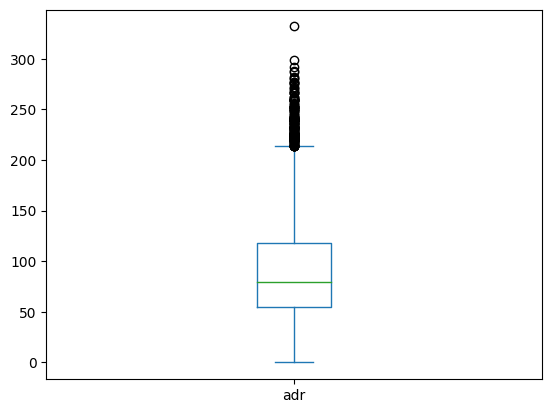

In [16]:
data1['adr'].plot(kind='box')

 there is just one data point that is above 300, which is an outlier. So we can just remove this outlier

In [17]:
data1= data1[data1['adr']<300]

#Exploratory Data Analysis (EDA)\ Data Visualization

 Derive 3 insights about attributes from the dataset using appropriate visualizations

In [18]:
data1['is_canceled'].value_counts(normalize=True)

1    0.544387
0    0.455613
Name: is_canceled, dtype: float64

In [19]:
data1['is_canceled'].value_counts()

1    3986
0    3336
Name: is_canceled, dtype: int64

In [20]:
data1['arrival_date_month'].value_counts(normalize=True)*100

July         18.369298
May          10.297733
October      10.215788
April         9.806064
August        9.546572
September     8.221797
March         7.211144
June          6.692161
December      6.364381
November      5.954657
February      5.599563
January       1.720841
Name: arrival_date_month, dtype: float64

insight 1: July has been the most busy month with 18.3% bookings followed by may (10.29%) and october (10.2%)

In [21]:
data1['customer_type'].value_counts(normalize=True)

Transient          0.730675
Transient-Party    0.226714
Contract           0.039060
Group              0.003551
Name: customer_type, dtype: float64

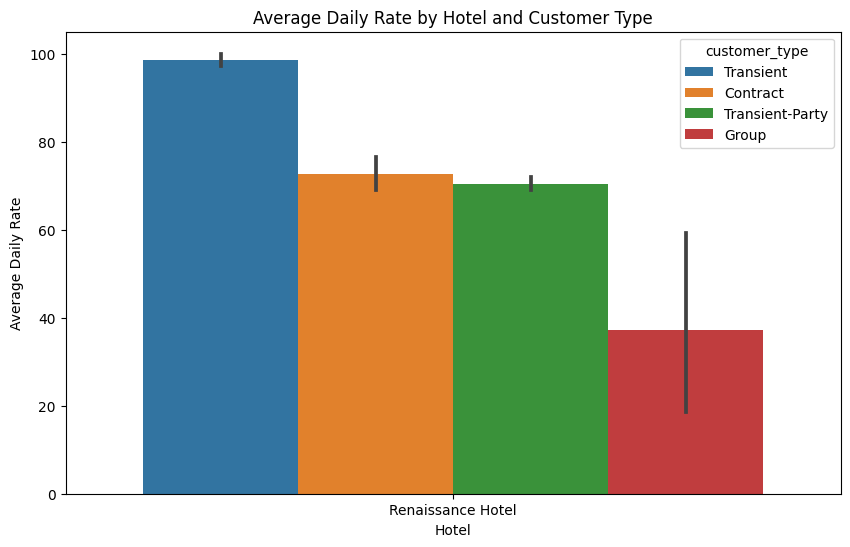

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='adr', hue='customer_type', data=data1)
plt.title('Average Daily Rate by Hotel and Customer Type')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate')
plt.show()

insight 2 :Transient type customers have done majority of bookings

In [23]:
# Top 5 countries with reservation canceled
canceled_data = data1[data1['is_canceled'] == 1]
top_5_country = canceled_data['country'].value_counts()[:5].reset_index()
top_5_country.columns = ['country','No. of guests']

fig = px.pie(top_5_country,names='country',values='No. of guests',title='Top 5 countries with reservation canceled',template='simple_white')
fig.update_traces(textposition='inside',textinfo='label+value+percent')
fig.show(renderer='colab')

In [24]:
fig = px.choropleth(top_5_country, locations='country',color='No. of guests',
                    title='Top 5 Countries with Bookings Canceled',
                    color_continuous_scale='Viridis',
                    labels={'country': 'Country', 'No. of guests': 'cancellation_count'})

fig.show(renderer='colab')

insight 3:Portugal has got highest cancellation rate

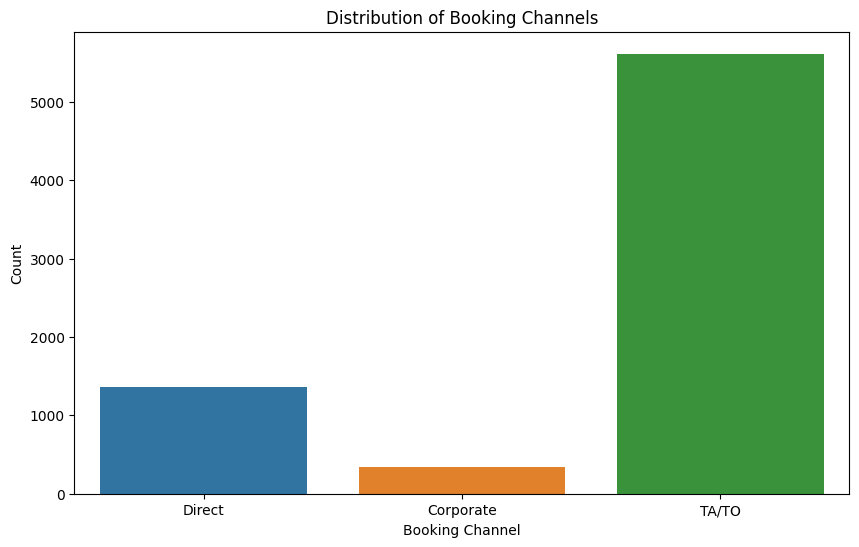

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=data1)
plt.title('Distribution of Booking Channels')
plt.xlabel('Booking Channel')
plt.ylabel('Count')
plt.show()

insight 4: the Direct channel experiences a higher cancellation rate, the Corporate channel has relatively few cancellations, while the TA/TO channel encounters a substantial number of cancellations.

## Come up with 3 promotions to offer per hotel (must be supported by results of queries of your own creation)

In [26]:
import findspark
findspark.init()

In [27]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
data1 = spark.read.csv('egphotelbookings.csv', header = True, inferSchema = True)
data1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: integer (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true

In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Promotion 1: "Family Package"

Query: Determine the percentage of bookings with children for each hotel.

In [29]:

# Calculate the percentage of bookings with children for each hotel
children_count = (data1.filter(col('children') > 0)
                  .groupBy('hotel')
                  .count()
                  .withColumnRenamed('count', 'children_count'))

total_count = (data1.groupBy('hotel')
               .count()
               .withColumnRenamed('count', 'total_count'))

children_percentage = (children_count.join(total_count, 'hotel')
                       .withColumn('percentage_children_bookings', (col('children_count') / col('total_count')) * 100)
                       .select('hotel', 'percentage_children_bookings'))

# Display the result
children_percentage.show(truncate=False)

+-----------------+----------------------------+
|hotel            |percentage_children_bookings|
+-----------------+----------------------------+
|Renaissance Hotel|7.807807807807808           |
+-----------------+----------------------------+



Considering that approximately 7.8% of bookings at the Renaissance Hotel include children, we can introduce a "Family Package" promotion. This promotion could include special perks and amenities tailored for families, such as discounted rates for children, complimentary meals for children, or family-friendly activities. so we can attract more families to choose the Renaissance Hotel for their stay.


# Promotion 2: "Weekend Getaway"

Query: Calculate the average number of stays in weekend nights for each hotel.

In [30]:
# Calculate the average number of stays in weekend nights for each hotel
from pyspark.sql.functions import avg
average_weekend_stays = (data1.groupBy('hotel')
                         .agg(avg('stays_in_weekend_nights').alias('average_weekend_stays')))

# Display the result
average_weekend_stays.show(truncate=False)

+-----------------+---------------------+
|hotel            |average_weekend_stays|
+-----------------+---------------------+
|Renaissance Hotel|1.2653562653562653   |
+-----------------+---------------------+



Hotel: Renaissance Hotel Average Number of Stays in Weekend Nights: 1.26

Promotion 2: "Weekend Getaway" Considering the average number of stays in weekend nights at 1.265529 for the Renaissance Hotel, we can introduce a "Weekend Getaway" promotion. This promotion could offer exclusive benefits for guests who stay over the weekends, such as discounted rates, complimentary breakfast, late check-out, or access to leisure facilities. By providing special perks tailored for weekend stays, we can attract guests who are seeking a relaxing and enjoyable weekend getaway at the Renaissance Hotel.

# Promotion 3: "Cancellation-Free Corporate Stay"

Query: Calculate the cancellation rates by distribution channel and customer type.

In [32]:
from pyspark.sql.functions import col, sum, count

# Calculate the cancellation rates by distribution channel and customer type
cancellation_rates = data1.groupBy('distribution_channel', 'customer_type') \
    .agg((sum(col('is_canceled')) / count('*')).alias('cancellation_rate'))



cancellation_rates.show()



+--------------------+---------------+-------------------+
|distribution_channel|  customer_type|  cancellation_rate|
+--------------------+---------------+-------------------+
|              Direct|          Group| 0.9230769230769231|
|               TA/TO|       Contract|0.18604651162790697|
|               TA/TO|Transient-Party|0.40744186046511627|
|               TA/TO|      Transient| 0.6304194984766816|
|              Direct|       Contract|0.08333333333333333|
|           Corporate|       Contract|                0.5|
|           Corporate|Transient-Party|0.40540540540540543|
|           Corporate|      Transient| 0.6620689655172414|
|              Direct|      Transient| 0.5403397027600849|
|               TA/TO|          Group|0.46153846153846156|
|              Direct|Transient-Party|             0.2625|
+--------------------+---------------+-------------------+



Promotion: "Cancellation-Free Corporate Stay" Considering the cancellation rates by distribution channel and customer type, we can introduce a "Cancellation-Free Corporate Stay" promotion. This promotion could offer exclusive benefits for corporate customers who book directly through the hotel's website or reservation center. By highlighting the low cancellation rate for corporate bookings made through the Corporate distribution channel, we assure corporate guests that their reservations are secure. Additionally, we can provide a flexible cancellation policy and personalized services to enhance their stay and cater to their business needs. The aim of this promotion is to attract corporate customers, increase direct bookings, and provide a reliable and enjoyable experience for business travelers.

## Using SparkML, produce at least 3 models to predict whether a booking will be canceled or not

In [33]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator 

In [34]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid='skip') for column in ['hotel', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']]

assembler = VectorAssembler(inputCols=['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'] + [column+"_index" for column in ['hotel', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']], outputCol="features")

featurizationPipeline = Pipeline(stages=indexers + [assembler])


In [35]:
from pyspark.ml import Pipeline

pipelineModel = featurizationPipeline.fit(data1)
df = pipelineModel.transform(data1)


In [36]:
# # Split the data into training and testing sets (70% for training, 30% for testing)
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

#model 1 : logisticRegression

In [37]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
lr = LogisticRegression(labelCol="is_canceled", featuresCol="features")
lr_model = lr.fit(train_data)

In [38]:
predictions = lr_model.transform(test_data)

In [39]:
true_labels=predictions.select('is_canceled')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Logistic Regression Accuracy =",accuracy*100,"%")

Logistic Regression Accuracy = 81.75287356321839 %


In [40]:
predicted_labels = predictions.select('is_canceled','prediction')
predicted_labels.show()

+-----------+----------+
|is_canceled|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       1.0|
|          1|       0.0|
|          1|       0.0|
|          0|       0.0|
|          0|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          1|       1.0|
|          0|       0.0|
|          1|       0.0|
|          0|       0.0|
|          0|       0.0|
+-----------+----------+
only showing top 20 rows



In [41]:
from pyspark.sql.functions import when
predicted_labels = predictions.select('is_canceled', 'prediction')
# Map the numerical prediction values to 'Yes' or 'No' labels
predicted_labels = predicted_labels.withColumn('prediction_label', when(predicted_labels.prediction == 1, 'Yes').otherwise('No'))
predicted_labels.show()


+-----------+----------+----------------+
|is_canceled|prediction|prediction_label|
+-----------+----------+----------------+
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          1|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
+-----------+----------+----------

#model 2 : Decision Tree Classifier

In [42]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="is_canceled", featuresCol="features", maxBins=64)

# Train the model
dt_model = dt.fit(train_data)


In [43]:
predictions2 = dt_model.transform(test_data)

In [44]:
rue_labels=predictions2.select('is_canceled')
dt_predictions=predictions2.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), dt_predictions.toPandas())
print("Decision Tree Classifier =",accuracy*100,"%")

Decision Tree Classifier = 89.41570881226055 %


In [53]:
from pyspark.sql.functions import when
predicted_labels = predictions2.select('is_canceled', 'prediction')
# Map the numerical prediction values to 'Yes' or 'No' labels
predicted_labels = predicted_labels.withColumn('prediction_label', when(predicted_labels.prediction == 1, 'Yes').otherwise('No'))
predicted_labels.show()

+-----------+----------+----------------+
|is_canceled|prediction|prediction_label|
+-----------+----------+----------------+
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
+-----------+----------+----------

## model 3 :Support Vector Machine (SVM) Classifier

In [46]:
from pyspark.ml.classification import LinearSVC

# Create a Support Vector Machine (SVM) Classifier
svm = LinearSVC(labelCol="is_canceled", featuresCol="features")

# Train the model
svm_model = svm.fit(train_data)

In [47]:
predictions3 = svm_model.transform(test_data)

In [48]:
rue_labels=predictions3.select('is_canceled')
lr_predictions=predictions3.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Decision Tree Classifier =",accuracy*100,"%")

Decision Tree Classifier = 83.47701149425288 %


In [54]:
from pyspark.sql.functions import when
predicted_labels = predictions3.select('is_canceled', 'prediction')
# Map the numerical prediction values to 'Yes' or 'No' labels
predicted_labels = predicted_labels.withColumn('prediction_label', when(predicted_labels.prediction == 1, 'Yes').otherwise('No'))
predicted_labels.show()

+-----------+----------+----------------+
|is_canceled|prediction|prediction_label|
+-----------+----------+----------------+
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          1|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       1.0|             Yes|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
|          1|       1.0|             Yes|
|          0|       0.0|              No|
|          1|       0.0|              No|
|          0|       0.0|              No|
|          0|       0.0|              No|
+-----------+----------+----------